In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
data = pd.read_csv("House Pricing Dataset.csv")
print(data.head())
print(data.tail())

        price    area  bedrooms  bathrooms  stories mainroad guestroom  \
0  13300000.0  7420.0       4.0        2.0      3.0      yes        no   
1  12250000.0  8960.0       4.0        4.0      4.0      yes        no   
2  12250000.0  9960.0       3.0        2.0      2.0      yes        no   
3  12215000.0  7500.0       4.0        2.0      2.0      yes        no   
4  11410000.0  7420.0       4.0        1.0      2.0      yes       yes   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0       no              no             yes      2.0      yes        furnished  
1       no              no             yes      3.0       no        furnished  
2      yes              no              no      2.0      yes   semi-furnished  
3      yes              no             yes      3.0      yes        furnished  
4      yes              no             yes      2.0       no        furnished  
         price    area  bedrooms  bathrooms  stories mainroad guestroom  \


In [8]:
df = pd.DataFrame(data)
df = pd.get_dummies(df, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
df.isnull().sum()


,0
price,4
area,4
bedrooms,4
bathrooms,4
stories,4
parking,4
mainroad_yes,0
guestroom_yes,0
basement_yes,0
hotwaterheating_yes,0


In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
parking,0
mainroad_yes,0
guestroom_yes,0
basement_yes,0
hotwaterheating_yes,0


In [11]:
x = df.drop('price', axis=1)
y = df['price']

print(x)
print(y)

       area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    7420.0       4.0        2.0      3.0      2.0          True   
1    8960.0       4.0        4.0      4.0      3.0          True   
2    9960.0       3.0        2.0      2.0      2.0          True   
3    7500.0       4.0        2.0      2.0      3.0          True   
4    7420.0       4.0        1.0      2.0      2.0          True   
..      ...       ...        ...      ...      ...           ...   
540  3000.0       2.0        1.0      1.0      2.0          True   
541  2400.0       3.0        1.0      1.0      0.0         False   
542  3620.0       2.0        1.0      1.0      0.0          True   
543  2910.0       3.0        1.0      1.0      0.0         False   
544  3850.0       3.0        1.0      2.0      0.0          True   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0            False         False                False                 True   
1            False         

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 976484771024.6133
R^2 Score: 0.6611214250980095


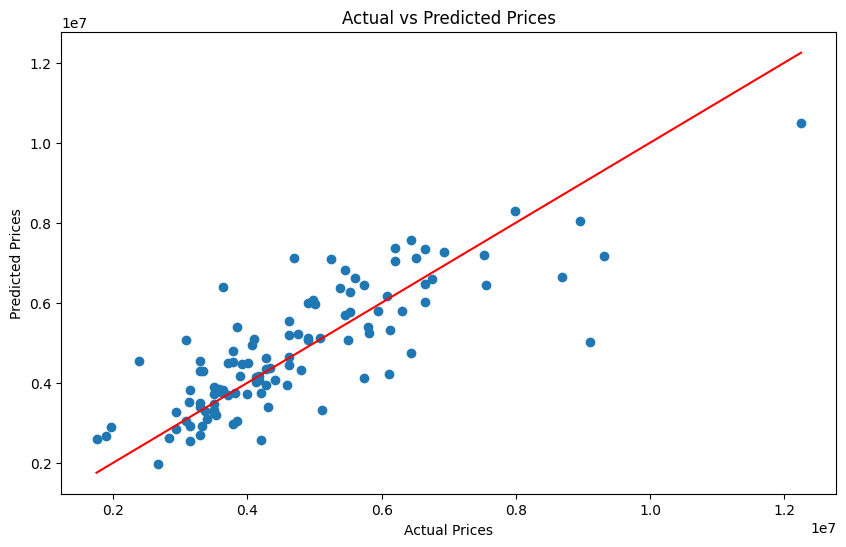

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()